In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
import pandas as pd
import timesynth as ts
from matplotlib import pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler

plt.rcParams['figure.figsize'] = [17, 4]
np.random.seed(100)

import os
import sys
module_path = os.path.abspath(os.path.join("../../"))
if module_path not in sys.path:
    sys.path.append(module_path)

In [2]:
data_directory = '../../data/GEFCom2014-W_V2/Wind/Task 15/'
df_power = pd.read_pickle(os.path.join(data_directory,"df_power.pkl"))
display(df_power.head())
print("first date: %s"% df_power.index[0])
print("last date: %s" % df_power.index[-1])

,wf1,wf2,wf3,wf4,wf5,wf6,wf7,wf8,wf9,wf10
datetime,,,,,,,,,,
2012-01-01 01:00:00,0.000000,0.596273,0.425465,0.378229,0.273678,0.268101,0.000000,0.000000,0.0,0.594361
2012-01-01 02:00:00,0.054879,0.411180,0.363851,0.063012,0.086796,0.034542,0.014708,0.014954,0.0,0.569679
2012-01-01 03:00:00,0.110234,0.167243,0.297129,0.036704,0.006811,0.020621,0.035098,0.071785,0.0,0.330539
2012-01-01 04:00:00,0.165116,0.037326,0.235438,0.034342,0.018646,0.001867,0.045055,0.066796,0.0,0.211308
2012-01-01 05:00:00,0.156940,0.051206,0.120904,0.033554,0.034812,0.015174,0.050160,0.034797,0.0,0.172140


first date: 2012-01-01 01:00:00
last date: 2013-12-01 00:00:00


In [3]:
df_wind = pd.read_pickle(os.path.join(data_directory,"df_wind.pkl"))
display(df_wind.head())
print("first date: %s"% df_wind.index[0])
print("last date: %s" % df_wind.index[-1])

1                                       2  \
                          U10       V10      U100      V100       U10   
datetime                                                                
2012-01-01 01:00:00  2.124600 -2.681966  2.864280 -3.666076 -0.171642   
2012-01-01 02:00:00  2.521695 -1.796960  3.344859 -2.464761 -0.088859   
2012-01-01 03:00:00  2.672210 -0.822516  3.508448 -1.214093 -0.246014   
2012-01-01 04:00:00  2.457504 -0.143642  3.215233 -0.355546 -0.680738   
2012-01-01 05:00:00  2.245898  0.389576  2.957678  0.332701 -1.261106   

                                                          3            ...  \
                          V10      U100      V100       U10       V10  ...   
datetime                                                               ...   
2012-01-01 01:00:00 -5.466031 -0.112594 -7.101347  2.193217 -4.649168  ...   
2012-01-01 02:00:00 -4.643205 -0.014100 -5.896778  2.970141 -3.944314  ...   
2012-01-01 03:00:00 -3.613395 -0.225238 -4.489369  3.238855 -3.144486  ...   
2012-01-01 04:00:00 -2.919615 -0.772046 -3.598824  3.260990 -2.228816  ...   
2012-01-01 05:00:00 -2.619786 -1.487537 -3.244667  2.940038 -2.040145  ...   

                            8                   9                      \
                         U100      V100       U10       V10      U100   
datetime                                                                
2012-01-01 01:00:00 -0.625438  0.298533  1.903254 -1.495002  2.516723   
2012-01-01 02:00:00  0.024957  0.797498  2.173296 -0.643641  2.837109   
2012-01-01 03:00:00  0.674786  1.626758  2.312744  0.136595  3.034096   
2012-01-01 04:00:00  0.936869  2.625774  2.217565  0.797156  2.941829   
2012-01-01 05:00:00  0.720637  3.501676  1.900598  1.285656  2.559177   

                                     10                                
                         V100       U10       V10      U100      V100  
datetime                                                               
2012-01-01 01:00:00 -2.078063  1.655790 -4.649593  2.024257 -5.992232  
2012-01-01 02:00:00 -1.006914  2.178609 -4.184944  2.623141 -5.318086  
2012-01-01 03:00:00 -0.015490  2.228633 -3.242442  2.645217 -4.052232  
2012-01-01 04:00:00  0.823531  2.077232 -2.345085  2.432947 -2.913831  
2012-01-01 05:00:00  1.471102  1.814716 -1.577625  2.097844 -1.976100  

[5 rows x 40 columns]

first date: 2012-01-01 01:00:00
last date: 2013-12-01 00:00:00


In [4]:
df_merged = {} 
for i in range(10):
    df_merged[f'{i+1}'] = pd.merge(df_power[f'wf{i+1}'], df_wind[f'{i+1}'], how='inner', left_index=True, right_index=True)
    # date = pd.to_datetime(df_merged.index)
    # df_merged['hod'] = date.hour # hour of the day
    # df_merged['dow'] = date.dayofweek # day of week
    # df_merged['month'] = date.month
    # df_merged['year'] = date.year
display(df_merged['1'].head())
print("first date: %s"% df_merged['1'].index[0])
print("last date: %s" % df_merged['1'].index[-1])

,wf1,U10,V10,U100,V100
datetime,,,,,
2012-01-01 01:00:00,0.000000,2.124600,-2.681966,2.864280,-3.666076
2012-01-01 02:00:00,0.054879,2.521695,-1.796960,3.344859,-2.464761
2012-01-01 03:00:00,0.110234,2.672210,-0.822516,3.508448,-1.214093
2012-01-01 04:00:00,0.165116,2.457504,-0.143642,3.215233,-0.355546
2012-01-01 05:00:00,0.156940,2.245898,0.389576,2.957678,0.332701


first date: 2012-01-01 01:00:00
last date: 2013-12-01 00:00:00


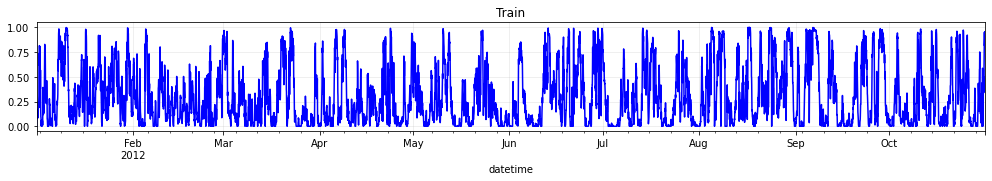

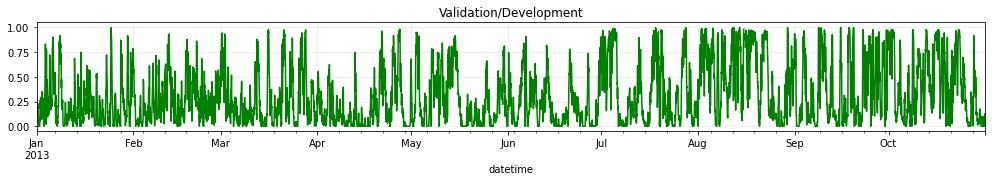

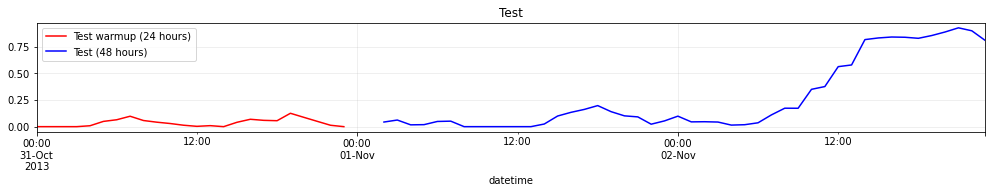

 train:  (7319, 5)
   dev:  (7296, 5)
warmup:  (24, 5)
  test:  (721, 5)


/opt/anaconda3/envs/thesis/lib/python3.7/site-packages/pandas/core/frame.py:4034: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  downcast=downcast, **kwargs)


In [5]:
wf_no = 1 # select only one wind_farm
train = df_merged[f'{wf_no}'].loc['2012-01-01 00:00:00':'2012-10-31 23:00:00'] # first year has 24 hours less
dev = df_merged[f'{wf_no}'].loc['2013-01-01 00:00:00':'2013-10-31 23:00:00']
test_beg = pd.Timestamp('2013-11-01 00:00:00')
# test = df_merged['1'].loc[test_beg:test_beg+pd.Timedelta('47H')]
test_duration = pd.Timedelta('47H')
test = df_merged[f'{wf_no}'].loc[test_beg: '2013-12-01 00:00:00']
test_warmup = df_merged[f'{wf_no}'].loc[test_beg-(test_duration//2+pd.Timedelta('1H')):test_beg-pd.Timedelta('1H')]
xxx = df_merged[f'{wf_no}'].loc[test_beg-test_duration:test_beg] # when want to visualize

# visualize
train[f'wf{wf_no}'].plot(figsize=(17,2), title='Train', color='blue')
plt.grid(alpha=0.25)
plt.show()
#
dev[f'wf{wf_no}'].plot(figsize=(17,2), title='Validation/Development', color='green')
plt.grid(alpha=0.25)
plt.show()
#
test_warmup[f'wf{wf_no}'].plot(figsize=(17,2), color='red', title='Test')
test.loc[test_beg:test_beg+test_duration, f'wf{wf_no}'].plot(color='blue')
plt.legend(['Test warmup (24 hours)', 'Test (48 hours)'])
plt.grid(alpha=0.25)
plt.show()

# dimensions
print(" train: ", train.shape)
print("   dev: ", dev.shape)
print("warmup: ", test_warmup.shape)
print("  test: ", test.shape)

# check for NaNs
# display(train.isna().sum())
# display(dev.isna().sum())
# display(test_warmup.isna().sum())
# display(test.isna().sum())

# fill NaNs with ffill as they are not too many
dev.fillna(method='ffill', inplace=True)
test.fillna(method='ffill', inplace=True)

# double check for NaNs
# display(dev.isna().sum())
# display(test.isna().sum())

/opt/anaconda3/envs/thesis/lib/python3.7/site-packages/pandas/plotting/_tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/opt/anaconda3/envs/thesis/lib/python3.7/site-packages/pandas/plotting/_tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/opt/anaconda3/envs/thesis/lib/python3.7/site-packages/pandas/plotting/_tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
/opt/anaconda3/envs/thesis/lib/python3.7/site-packages/pandas/

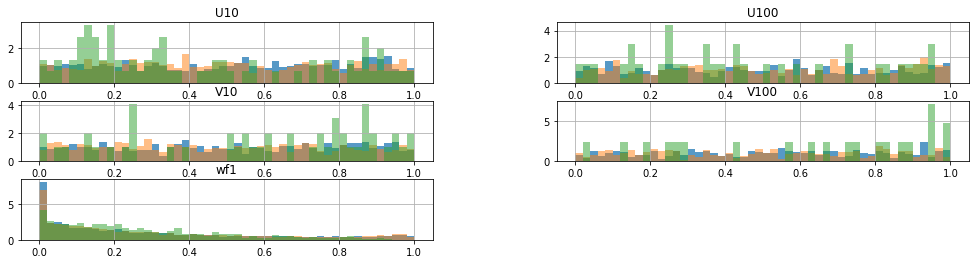

In [6]:
# Look at the distribution of Train-Dev-Test
ax = train.hist(density=True, bins=50, range=(0,1), alpha=0.75)
dev.hist(density=True, bins=50, range=(0,1), alpha=0.5, ax=ax.flatten()[:-1])
test.hist(density=True, bins=50, range=(0,1), ax=ax.flatten()[:-1], alpha=0.5)
plt.show()

In [7]:
horizon=48
n_input=4
debug = False
n_features = train.shape[1]

In [8]:
import keras.backend as K
from models.RNN_v2 import (ModelRNNNonBayesian, 
                           ModelRNNEpistemic, 
                           ModelRNNAleatoric,
                           ModelRNNAleatoricEpistemic)



Using TensorFlow backend.


In [9]:
modelRNNNonBayesian = ModelRNNNonBayesian("model_rnn_nonbayesian", n_input, n_features)
modelRNNNonBayesian.load_weights("../saved_models/model_rnn_nonbayesian.h5")

Model: "model_rnn_nonbayesian"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 4, 5)              0         
_________________________________________________________________
gru_1 (GRU)                  (None, 100)               31800     
_________________________________________________________________
mean (Dense)                 (None, 1)                 101       
Total params: 31,901
Trainable params: 31,901
Non-trainable params: 0
_________________________________________________________________
None
Loaded the model weights from file!


In [10]:
modelRNNEpistemic = ModelRNNEpistemic("model_rnn_epistemic", n_input, n_features)
modelRNNEpistemic.load_weights('../saved_models/model_rnn_epistemic.h5')

Model: "model_rnn_epistemic"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 4, 5)              0         
_________________________________________________________________
gru_2 (GRU)                  (None, 100)               31800     
_________________________________________________________________
mean (Dense)                 (None, 1)                 101       
Total params: 31,901
Trainable params: 31,901
Non-trainable params: 0
_________________________________________________________________
None
Loaded the model weights from file!


In [11]:
modelRNNAleatoric = ModelRNNAleatoric("model_rnn_aleatoric", n_input, n_features)
modelRNNAleatoric.load_weights('../saved_models/model_rnn_aleatoric.h5')

Model: "model_rnn_aleatoric"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            (None, 4, 5)         0                                            
__________________________________________________________________________________________________
gru_3 (GRU)                     (None, 100)          31800       input_3[0][0]                    
__________________________________________________________________________________________________
mean (Dense)                    (None, 1)            101         gru_3[0][0]                      
__________________________________________________________________________________________________
log_var (Dense)                 (None, 1)            101         gru_3[0][0]                      
Total params: 32,002
Trainable params: 32,002
Non-trainable params: 0
__________

In [12]:
modelRNNALEP = ModelRNNAleatoricEpistemic("model_rnn_alep", n_input, n_features)
modelRNNALEP.load_weights('../saved_models/model_rnn_alep.h5')

Model: "model_rnn_alep"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            (None, 4, 5)         0                                            
__________________________________________________________________________________________________
gru_4 (GRU)                     (None, 100)          31800       input_4[0][0]                    
__________________________________________________________________________________________________
mean (Dense)                    (None, 1)            101         gru_4[0][0]                      
__________________________________________________________________________________________________
log_var (Dense)                 (None, 1)            101         gru_4[0][0]                      
Total params: 32,002
Trainable params: 32,002
Non-trainable params: 0
_______________

In [13]:
import itertools
def energy_score_new(y, y_trajs, beta=1):
    assert len(y.shape) == 2
    assert len(y_trajs.shape) == 2
    
    def ed_cacl(x,y):
        N = y.shape[1]
        M = x.shape[1]
        val = np.sum([np.linalg.norm(x-y[:,i].reshape(-1,1), ord=2, axis=0) for i in range(N)])
        return val / (N*M)

    def ei_calc(x):
        M = x.shape[1]
        val = np.sum([np.linalg.norm(x[:,i]-x[:,j], ord=2) if i != j else 0 \
                      for i, j in itertools.product(*[range(M), range(M)])])
        return  val / (M*M)

    ED = ed_cacl(y, y_trajs)
    EI_x = ei_calc(y_trajs)
    EI_y = ei_calc(y) if y.shape[1] >= 1 else 0
#     print(ED)
#     print(EI_x)
#     print(EI_y)
        
    return ED-0.5*EI_x-0.5*EI_y 

In [14]:
def retrieve_trajectories(model):
    trajs_means = []
    nr_trajectories = model.mcSimulation.get_nr_trajectories()
    nr_scenarios_per_traj = model.mcSimulation.get_nr_senarios_per_trajectory()
    for j in range(nr_trajectories):
        means = []
        for i in range(nr_scenarios_per_traj):
            means.append(np.mean([m.mu for m in model.mcSimulation.trajectories[j].leadTimeScenarios[i].scenarios]))
        trajs_means.append(means)
    return np.array(trajs_means)

def plot_trajectories(trajs_means, warmup, test):
    plt.figure(figsize=(17,3))
    n_wu = len(warmup) if warmup is not None else 0
    horizon=trajs_means.shape[1]
    if warmup is not None:
        plt.plot(warmup[:,0], color='red', linestyle='-', linewidth=2, label='Warmup sequence')
    plt.plot(range(n_wu,n_wu+horizon), test[:,0], color='blue', linewidth=2, alpha=0.4, label='Observation')
    plt.plot(range(n_wu,n_wu+horizon), trajs_means.T, color='orangered', linewidth=2, alpha=0.4)
    plt.plot([], color='orangered', linewidth=2, alpha=0.4, label='Forecast')
    plt.xlim([0,horizon])
    plt.ylim([0,1])
    plt.xlabel('Leadtime')
    plt.grid(alpha=0.25)
    plt.legend(bbox_to_anchor=(1.02, 1), loc="upper left", borderaxespad=0)
    plt.title('')
    plt.show()


In [15]:
from utility.visualization import plot_forecast_dense
from sklearn.metrics import mean_squared_error, mean_absolute_error
from utility.probabilistic_forecast import ProbabilisticForecast
from tqdm.auto import tqdm

def cross_validation_scenarios(model, density=False, scenarios=True, debug=True):
    plt.rcParams['figure.figsize'] = [10, 3]
    n_splits=20
    tscv = TimeSeriesSplit(n_splits=n_splits)
    errors_es = []
    errors_mse = []
    model_stds = []
    yreal_dev = [] # for final evaluation
    for tr_idx, te_idx in tqdm(tscv.split(dev), total=n_splits):
        X = dev.values[tr_idx,:]
        y = dev.values[tr_idx[-1]+1:tr_idx[-1]+1+horizon,:]
        if density:
            yhat = model.forecast(warmup=X[-n_input:], test=y, nr_simulations=10)
            # visualize
            if debug:
                plot_forecast_dense(X[-horizon:,0], y[:,0], yhat, horizon=horizon, 
                                    alphas=[0.05, 0.15, 0.25, 0.35, 0.5], figsize=(17,3))
                #plot_vis1(yhat.median(), yhat.std(), y, expressive=False)
                #plot_vis2(yhat.median(), yhat.std(), y, expressive=False)
            model_stds.append(np.mean(yhat.std()))
            errors_mse.append(mean_squared_error(y[:,0], yhat.median()))
            yreal_dev.append(y)
            plt.figure(figsize=(10,4))
            plt.subplot(1,2,1)
            plt.boxplot(errors_mse)
            plt.title('MSE average: %2.4f' % np.mean(errors_mse))
            #
            plt.subplot(1,2,2)
            plt.boxplot(model_stds)
            plt.title('STD average: %2.4f' % np.mean(model_stds))
            plt.show()
        #
        if scenarios:
            n_sims = 10
            # horizon = len(traj_test)
            warmup=X[-n_input:]
            test=y
            y_sfalepRNN = model.scenario_forecast(test_warmup=warmup.reshape(-1,n_input,5), test=test.reshape(-1,5,1), horizon=horizon, n_sims=n_sims)
            trajs_means = retrieve_trajectories(model)
            errors_es.append( energy_score_new(test[:,0].reshape(-1,1), trajs_means.T) )
            if debug:
                plot_trajectories(trajs_means, warmup, test)
                
    return errors_es, errors_mse, model_stds, yreal_dev

In [17]:
import time 
from models.baselines.quantile_naive import QuantileNaive
from sklearn.model_selection import TimeSeriesSplit
from utility.evaluation import evaluate
plt.rcParams['figure.figsize'] = [10, 3]

horizon = 48
n_sims = 20
n_splits = 20
tscv = TimeSeriesSplit(n_splits=n_splits)
methods = ['qnaiveW', 'qnaiveX', 'nonbayesian', 'al', 'sfal', 'ep', 'sfep', 'alep', 'sfalep']
mse = {m:[] for m in methods}
nmae = {m:[] for m in methods}
ncrps = {m:[] for m in methods}
es_scores = {m:[] for m in methods}
forecasts = {m:[] for m in methods}
forecast_time = {m:[] for m in methods}
y_real = []

for tr_idx, te_idx in tqdm(tscv.split(dev), total=n_splits):
    X = dev.values[tr_idx,:]
    y = dev.values[tr_idx[-1]+1:tr_idx[-1]+1+horizon,:]
#     y_nonoise = dev_sig[tr_idx[-1]+1:tr_idx[-1]+1+horizon]
    y_real.append(y[:,0])
    
    # no noise signal
    start = time.time()
#     mse['nonoise'].append(mean_squared_error(y, y_nonoise))
#     forecast_time['nonoise'].append(time.time()-start)
    
    # quantile naive with X
    start = time.time()
    quantileNaive = QuantileNaive(horizon=horizon, forecast_with_warmup=False)
    quantileNaive.fit(X, y)
    y_qnaiveX = quantileNaive.forecast_probabilistic(warmup=X[:,0], test=y[:,0])
    #assert len(y_qnaiveX) == len(y)
    forecasts['qnaiveX'].append(y_qnaiveX)
    mse['qnaiveX'].append(mean_squared_error(y[:,0], y_qnaiveX.median()))
    ncrps_qnaiveX, nmae_qnaiveX = evaluate(y[:,0], [y_qnaiveX], period=horizon)
    nmae['qnaiveX'].append(nmae_qnaiveX)
    ncrps['qnaiveX'].append(ncrps_qnaiveX)
    forecast_time['qnaiveX'].append(time.time()-start)
    
    # quantile naive with Warmup
    start = time.time()
    quantileNaive = QuantileNaive(horizon=horizon, forecast_with_warmup=True)
    y_qnaiveW = quantileNaive.forecast_probabilistic(warmup=X[-n_input:,0], test=y[:,0])
    #assert len(y_qnaiveW.foreca) == len(y)
    forecasts['qnaiveW'].append(y_qnaiveW)
    mse['qnaiveW'].append(mean_squared_error(y[:,0], y_qnaiveW.median()))
    ncrps_qnaiveW, nmae_qnaiveW = evaluate(y[:,0], [y_qnaiveW], period=horizon)
    nmae['qnaiveW'].append(nmae_qnaiveW)
    ncrps['qnaiveW'].append(ncrps_qnaiveW)
    forecast_time['qnaiveW'].append(time.time()-start)
    
    # non-bayesian model
    start = time.time()
    y_old = modelRNNNonBayesian.forecast(warmup=X[-n_input:], test=y)
    assert len(y_old) == len(y)
    forecasts['nonbayesian'].append(y_old)
    mse['nonbayesian'].append(mean_squared_error(y[:,0], y_old))
    nmae['nonbayesian'].append(mean_absolute_error(y[:,0], y_old))
    ncrps['nonbayesian'].append(0)
    forecast_time['nonbayesian'].append(time.time()-start)
    
    # old model ES
#     start = time.time()
#     y_old_es = modelOldES.forecast(warmup=X[-n_input:], test=y)
#     assert len(y_old_es) == len(y)
#     forecasts['old_es'].append(y_old_es)
#     mse['old_es'].append(mean_squared_error(y[:,0], y_old_es))
#     nmae['old_es'].append(mean_absolute_error(y[:,0], y_old_es))
#     ncrps['old_es'].append(0)
#     forecast_time['old_es'].append(time.time()-start)
    
    # aleatoric (AL)
    start = time.time()
    y_al = modelRNNAleatoric.forecast(warmup=X[-n_input:], test=y)
    assert len(y_al.median()) == len(y)
    forecasts['al'].append(y_al)
    mse['al'].append(mean_squared_error(y[:,0], y_al.median()))
    ncrps_al, nmae_al = evaluate(y[:,0], [y_al], period=horizon)
    nmae['al'].append(nmae_al)
    ncrps['al'].append(ncrps_al)
    forecast_time['al'].append(time.time()-start)

    # Scenario Forecasting (SF) + AL
    start = time.time()
    y_sfal = modelRNNAleatoric.scenario_forecast(test_warmup=X[-n_input:], test=y, horizon=horizon, n_sims=n_sims)
    trajs_means = retrieve_trajectories(modelRNNAleatoric)
    es_scores['sfal'].append( energy_score_new(y[:,0].reshape(-1,1), trajs_means.T) )
    assert len(y_sfal.median()) == len(y)
    forecasts['sfal'].append(y_sfal)
    mse['sfal'].append(mean_squared_error(y[:,0], y_sfal.median()))
    ncrps_sfal, nmae_sfal = evaluate(y[:,0], [y_sfal], period=horizon)
    nmae['sfal'].append(nmae_sfal)
    ncrps['sfal'].append(ncrps_sfal)
    forecast_time['sfal'].append(time.time()-start)

    
    # epistemic (EP)
    start = time.time()
    y_ep = modelRNNEpistemic.forecast(warmup=X[-n_input:], test=y)
    assert len(y_ep.median()) == len(y)
    forecasts['ep'].append(y_ep)
    mse['ep'].append(mean_squared_error(y[:,0], y_ep.median()))    
    ncrps_ep, nmae_ep = evaluate(y[:,0], [y_ep], period=horizon)
    nmae['ep'].append(nmae_ep)
    ncrps['ep'].append(ncrps_ep)
    forecast_time['ep'].append(time.time()-start)

    # Scenario Forecasting (SF) + EP
    start = time.time()
    y_sfep = modelRNNEpistemic.scenario_forecast(test_warmup=X[-n_input:], test=y, horizon=horizon, n_sims=n_sims)
    trajs_means = retrieve_trajectories(modelRNNEpistemic)
    es_scores['sfep'].append( energy_score_new(y[:,0].reshape(-1,1), trajs_means.T) )
    assert len(y_sfep.median()) == len(y)
    forecasts['sfep'].append(y_sfep)
    mse['sfep'].append(mean_squared_error(y[:,0], y_sfep.median()))
    ncrps_sfep, nmae_sfep = evaluate(y[:,0], [y_sfep], period=horizon)
    nmae['sfep'].append(nmae_sfep)
    ncrps['sfep'].append(ncrps_sfep)
    forecast_time['sfep'].append(time.time()-start)
    
    # ALEP: AL+EP
    start = time.time()
    y_alep = modelRNNALEP.forecast(warmup=X[-n_input:], test=y)
    assert len(y_alep.median()) == len(y)
    forecasts['alep'].append(y_alep)
    mse['alep'].append(mean_squared_error(y[:,0], y_alep.median()))
    ncrps_alep, nmae_alep = evaluate(y[:,0], [y_alep], period=horizon)
    nmae['alep'].append(nmae_alep)
    ncrps['alep'].append(ncrps_alep)
    forecast_time['alep'].append(time.time()-start)
    
    # Scenario Forecasting (SF) + ALEP
    start = time.time()
    y_sfalep = modelRNNALEP.scenario_forecast(test_warmup=X[-n_input:], test=y, horizon=horizon, n_sims=n_sims)
    trajs_means = retrieve_trajectories(modelRNNALEP)
    es_scores['sfalep'].append( energy_score_new(y[:,0].reshape(-1,1), trajs_means.T) )
    assert len(y_sfalep.median()) == len(y)
    forecasts['sfalep'].append(y_sfalep)
    mse['sfalep'].append(mean_squared_error(y[:,0], y_sfalep.median()))
    ncrps_sfalep, nmae_sfalep = evaluate(y[:,0], [y_sfalep], period=horizon)
    nmae['sfalep'].append(nmae_sfalep)
    ncrps['sfalep'].append(ncrps_sfalep)
    forecast_time['sfalep'].append(time.time()-start)
    
#     errors_alep2.append(mean_squared_error(y, pforecast.median()))
#     yreal_dev.append(y)
    #print("%i -> %2.3f" % (i, errors[-1]))
    #i+=1
    
# plt.figure(figsize=(6,4))
# plt.boxplot(errors_alep2)
# plt.title('MSE average: %2.4f' % np.mean(errors_alep2))
# plt.show()
#

In [18]:
np.save("results", [mse, nmae, ncrps, es_scores, forecasts, forecast_time, y_real])

In [ ]:
# loaded_results = np.load("results.npy", allow_pickle=True)
# loaded_results

In [19]:
def dict_subset(dic, keys=[]):
    return {k:dic[k] for k in keys} if keys is not [] else None

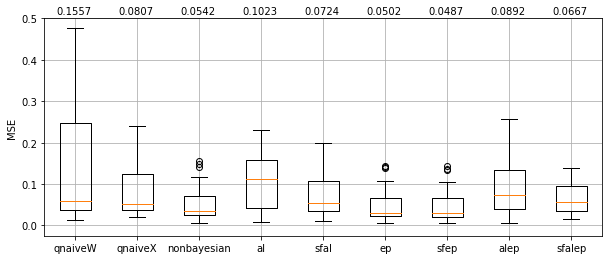

In [20]:
mse_subset = dict_subset(es_scores, keys=['qnaiveW', 'qnaiveX', 'nonbayesian', 'al', 'sfal', 'ep', 'sfep', 'alep', 'sfalep'])
plt.figure(figsize=(10,4))
plt.boxplot(mse.values())
plt.xticks(range(1, len(mse.keys())+1),mse.keys())
for i, txt in enumerate(np.array([np.round(np.mean(v),4) for v in mse.values()]).astype('str')):
    # np.max(list(mse.values()))[i]
    plt.text(i+0.7, 0.51, s=txt)
plt.grid()
plt.ylim([-0.025,.5])
plt.ylabel('MSE')
plt.show()

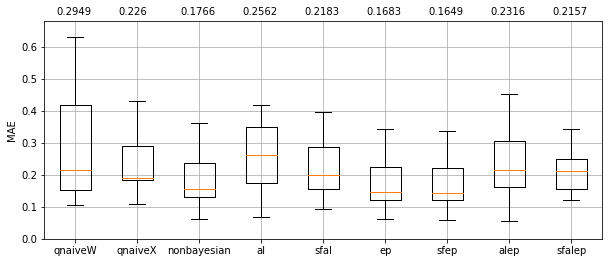

In [21]:
nmae_avg = []
nmae_models = ['qnaiveW', 'qnaiveX', 'nonbayesian', 'al', 'sfal', 'ep', 'sfep', 'alep', 'sfalep']
for k in nmae_models:
    if k == 'nonbayesian':
        nmae_avg.append(np.array(nmae[k]))
    else:
        nmae_avg.append(np.array(nmae[k]).mean(axis=2).flatten())

plt.figure(figsize=(10,4))
plt.boxplot(nmae_avg)
plt.xticks(range(1, len(nmae_models)+1),nmae_models)
for i, txt in enumerate(np.array([np.round(np.mean(v),4) for v in nmae_avg]).astype('str')):
    # np.max(list(mse.values()))[i]
    plt.text(i+0.7, 0.7, s=txt)
plt.grid()
plt.ylim([0,.68])
plt.ylabel('MAE')
plt.show()

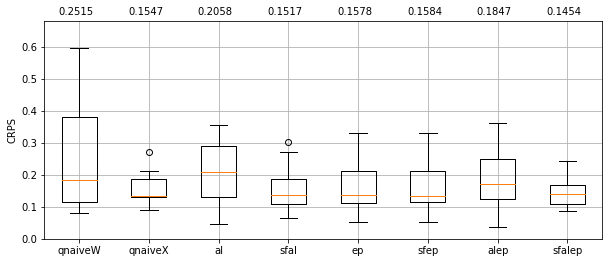

In [22]:
ncrps_avg = []
ncrps_models = ['qnaiveW', 'qnaiveX', 'al', 'sfal', 'ep', 'sfep', 'alep', 'sfalep']
for k in ncrps_models:
    ncrps_avg.append(np.array(ncrps[k]).mean(axis=2).flatten())

plt.figure(figsize=(10,4))
plt.boxplot(ncrps_avg)
plt.xticks(range(1, len(ncrps_models)+1),ncrps_models)
for i, txt in enumerate(np.array([np.round(np.mean(v),4) for v in ncrps_avg]).astype('str')):
    # np.max(list(mse.values()))[i]
    plt.text(i+0.7, 0.7, s=txt)
plt.grid()
plt.ylim([0,.68])
plt.ylabel('CRPS')
plt.show()

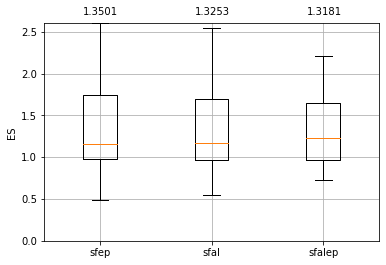

In [23]:
es_scores_subset = dict_subset(es_scores, keys=['sfep', 'sfal', 'sfalep'])
plt.figure(figsize=(6,4))
plt.boxplot(es_scores_subset.values())
plt.xticks(range(1, len(es_scores_subset.keys())+1),es_scores_subset.keys())
for i, txt in enumerate(np.array([np.round(np.mean(v),4) for v in es_scores_subset.values()]).astype('str')):
    # np.max(list(mse.values()))[i]
    plt.text(i+0.85, 2.7, s=txt)
plt.grid()
plt.ylim([0,2.6])
plt.ylabel('ES')
plt.show()